# 1. Stock Return Calculation - NASDAQ TOP 15

- df.pct_change()
- df.product()

```
Step 1. Library Import & Load Data
Step 2. Calculate the rate of return (aapl)
Step 3. Calculate the rate of return (nasdaq)
Step 4. Sort by Return (top 15)
```


## Step 1. Library import & Load Data

In [1]:
import FinanceDataReader as fdr

In [5]:
nasdaq = fdr.StockListing('NASDAQ')

100%|██████████| 3813/3813 [00:05<00:00, 716.35it/s]


In [6]:
nasdaq.head()

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


In [7]:
len(nasdaq)

3813

## Step 2. Calculate the rate of return (aapl)

In [13]:
aapl = fdr.DataReader('AAPL', '2021-01-01') # 2021-01-01 ~ now

In [14]:
aapl

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-01-04,129.41,133.52,133.61,126.76,143300000.0,-0.0247
2021-01-05,131.01,128.89,131.74,128.43,97670000.0,0.0124
2021-01-06,126.60,127.72,131.05,126.38,155090000.0,-0.0337
2021-01-07,130.92,128.36,131.63,127.86,109580000.0,0.0341
2021-01-08,132.05,132.43,132.63,130.23,105160000.0,0.0086
...,...,...,...,...,...,...
2021-05-11,125.91,123.12,126.27,122.84,126140000.0,-0.0074
2021-05-12,122.77,123.50,124.59,122.25,112170000.0,-0.0249
2021-05-13,124.97,124.72,126.11,124.27,105860000.0,0.0179


<AxesSubplot:xlabel='Date'>

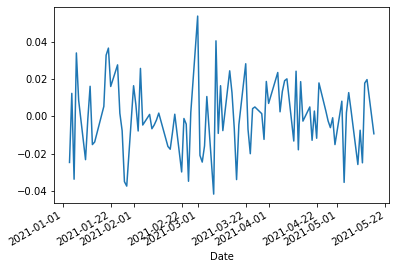

In [17]:
aapl['Change'].plot()

In [18]:
aapl.iloc[0]

Close     1.294100e+02
Open      1.335200e+02
High      1.336100e+02
Low       1.267600e+02
Volume    1.433000e+08
Change   -2.470000e-02
Name: 2021-01-04 00:00:00, dtype: float64

In [21]:
aapl['Close']

Date
2021-01-04    129.41
2021-01-05    131.01
2021-01-06    126.60
2021-01-07    130.92
2021-01-08    132.05
               ...  
2021-05-11    125.91
2021-05-12    122.77
2021-05-13    124.97
2021-05-14    127.45
2021-05-17    126.27
Name: Close, Length: 93, dtype: float64

In [32]:
aapl['Close'].pct_change()+1

Date
2021-01-04         NaN
2021-01-05    1.012364
2021-01-06    0.966338
2021-01-07    1.034123
2021-01-08    1.008631
                ...   
2021-05-11    0.992590
2021-05-12    0.975062
2021-05-13    1.017920
2021-05-14    1.019845
2021-05-17    0.990741
Name: Close, Length: 93, dtype: float64

In [34]:
(aapl['Close'].pct_change()+1).product()

0.9757360327640845

## Step 3. Calculate the rate of return (nasdaq)

In [35]:
nasdaq

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
...,...,...,...,...
3808,DISA,Disruptive Acquisition Corporation I Class A,기타 금융업,556010
3809,DCRC,Decarbonization Plus Acquisition Corporation I...,기타 금융업,556010
3810,CRZN,Corazon Capital V838 Monoceros Corp Class A,기타 금융업,556010
3811,MSDA,MSD Acquisition Corp,기타 금융업,556010


In [52]:
nasdaq_price = {}
i = 0
for symbol in list(nasdaq['Symbol'].values):
    nasdaq_price[symbol]=fdr.DataReader('{}'.format(symbol), '2021-01-01')['Close'].values
    i += 1
    print('load data .. {} - {}/15'.format(symbol, i))
    if i >= 15:
        break

load data .. AAPL - 1/15
load data .. MSFT - 2/15
load data .. AMZN - 3/15
load data .. FB - 4/15
load data .. GOOGL - 5/15
load data .. GOOG - 6/15
load data .. TSLA - 7/15
load data .. NVDA - 8/15
load data .. PYPL - 9/15
load data .. ASML - 10/15
load data .. CMCSA - 11/15
load data .. ADBE - 12/15
load data .. CSCO - 13/15
load data .. INTC - 14/15
load data .. NFLX - 15/15


In [56]:
import pandas as pd
nd_df = pd.DataFrame(columns=nasdaq['Symbol'][:15], 
                     data=nasdaq_price)

In [58]:
nd_df

Symbol,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML,CMCSA,ADBE,CSCO,INTC,NFLX
0,129.41,217.69,3186.63,268.94,1726.13,1728.24,729.77,524.54,231.92,500.00,50.51,485.34,43.96,49.67,522.86
1,131.01,217.90,3218.51,270.97,1740.05,1740.92,735.11,536.19,234.91,505.36,49.98,485.69,43.98,50.61,520.80
2,126.60,212.25,3138.38,263.31,1722.88,1735.29,755.98,504.58,226.83,490.22,50.56,466.31,44.40,51.10,500.49
3,130.92,218.29,3162.16,268.74,1774.34,1787.25,816.04,533.76,235.04,501.43,50.66,477.74,44.96,52.19,508.89
4,132.05,219.62,3182.70,267.57,1797.83,1807.21,880.02,531.07,242.46,508.74,51.54,485.10,45.06,51.65,510.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,125.91,246.23,3223.91,306.53,2270.06,2308.76,617.20,572.25,248.60,630.66,57.50,485.19,52.83,55.04,495.08
89,122.77,239.00,3151.94,302.55,2200.25,2239.08,589.89,550.34,239.91,601.88,56.62,472.09,51.60,53.62,484.98
90,124.97,243.03,3161.47,305.26,2229.04,2261.97,571.69,546.61,240.80,623.09,57.39,474.16,52.49,54.01,486.66
91,127.45,248.15,3222.90,315.94,2278.38,2316.16,589.74,569.72,246.29,647.76,58.68,486.56,52.90,55.35,493.37


In [60]:
nd_df.isnull().sum()

Symbol
AAPL     0
MSFT     0
AMZN     0
FB       0
GOOGL    0
GOOG     0
TSLA     0
NVDA     0
PYPL     0
ASML     0
CMCSA    0
ADBE     0
CSCO     0
INTC     0
NFLX     0
dtype: int64

In [62]:
(nd_df.pct_change()+1)

Symbol,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,PYPL,ASML,CMCSA,ADBE,CSCO,INTC,NFLX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.012364,1.000965,1.010004,1.007548,1.008064,1.007337,1.007317,1.022210,1.012892,1.010720,0.989507,1.000721,1.000455,1.018925,0.996060
2,0.966338,0.974071,0.975103,0.971731,0.990132,0.996766,1.028390,0.941047,0.965604,0.970041,1.011605,0.960098,1.009550,1.009682,0.961002
3,1.034123,1.028457,1.007577,1.020622,1.029869,1.029943,1.079447,1.057830,1.036195,1.022867,1.001978,1.024512,1.012613,1.021331,1.016784
4,1.008631,1.006093,1.006496,0.995646,1.013239,1.011168,1.078403,0.994960,1.031569,1.014578,1.017371,1.015406,1.002224,0.989653,1.002967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.992590,0.996157,1.010475,1.001830,0.990536,0.985950,0.981178,1.002839,1.020400,1.005420,0.999826,1.012120,0.993792,0.983384,1.017239
89,0.975062,0.970637,0.977676,0.987016,0.969248,0.969819,0.955752,0.961713,0.965044,0.954365,0.984696,0.973000,0.976718,0.974201,0.979599
90,1.017920,1.016862,1.003024,1.008957,1.013085,1.010223,0.969147,0.993222,1.003710,1.035240,1.013599,1.004385,1.017248,1.007273,1.003464
91,1.019845,1.021067,1.019431,1.034987,1.022135,1.023957,1.031573,1.042279,1.022799,1.039593,1.022478,1.026152,1.007811,1.024810,1.013788


In [70]:
return_per = round((nd_df.pct_change()+1).product() - 1 ,2)

In [71]:
return_per

Symbol
AAPL    -0.02
MSFT     0.13
AMZN     0.03
FB       0.17
GOOGL    0.33
GOOG     0.34
TSLA    -0.21
NVDA     0.08
PYPL     0.05
ASML     0.27
CMCSA    0.10
ADBE    -0.01
CSCO     0.20
INTC     0.11
NFLX    -0.06
dtype: float64

## Step 4. Sort by return
- Top 3 - GOOG, GOOGL, ASML

In [72]:
return_per.sort_values(ascending=False)

Symbol
GOOG     0.34
GOOGL    0.33
ASML     0.27
CSCO     0.20
FB       0.17
MSFT     0.13
INTC     0.11
CMCSA    0.10
NVDA     0.08
PYPL     0.05
AMZN     0.03
ADBE    -0.01
AAPL    -0.02
NFLX    -0.06
TSLA    -0.21
dtype: float64